In [6]:
# I need to call all the data in the scattering matrices and make them into a HDF5 file
import numpy as np
import h5py
import os
import sys
# Importing the necessary libraries
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network_factory import generate_network
from matplotlib import pyplot as plt
import json

In [7]:
network_type = 'delaunay'
network_shape = 'circular'
random_seed = 5
num_internal_nodes = 3
num_external_nodes = 3
num_seed_nodes = None
network_size = 200e-6
external_size = 250e-6
external_offset = 0.0

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape,
                            random_seed=random_seed,
                            num_internal_nodes=num_internal_nodes,
                            num_external_nodes=num_external_nodes,
                            num_seed_nodes=num_seed_nodes,
                            network_size=network_size,
                            external_size=external_size,
                            external_offset=external_offset)

with h5py.File('test.h5', 'w') as h5file:
    all_vars = vars(network_spec)
    # Pop the material object from the network_config as it is not json serializable
    material = all_vars.pop('material', None)
    # node_params = all_vars.pop('node_S_mat_params', None)
    # fully_connected = all_vars.pop('fully_connected', None)

    for key, value in all_vars.items():
        h5file.attrs[key] = json.dumps(value)
        # print(json.dumps(value))

    material_vars = vars(material)
    print(material_vars)
    # material_vars.pop('_n')
    # material_vars.pop('_dn')
    # for key, value in material_vars.items():
    #     h5file.attrs[key] = value
    # material_dict = json.dumps(material_vars)
    # print(material_dict)
# for key in all_vars:
#     if key == 'node_S_mat_params':
#         node_S_params_dict = json.dumps(all_vars['node_S_mat_params'])
#     elif key == 'material':
#         material_vars = vars(all_vars['material'])
#         material_vars.pop('_n')
#         material_vars.pop('_dn')
#         material_dict = json.dumps(material_vars)
#     elif key == 'fully_connected':
#         fully_connected = all_vars['fully_connected']
#     else:
#         pass


{'material': 'glass', 'B': array([1.03961212, 0.23179234, 1.01046945]), 'C': array([6.00069867e-03, 2.00179144e-02, 1.03560653e+02]), '_n': functools.partial(<function n_sellmeier_k0 at 0x7fd6856d6e80>, B=array([1.03961212, 0.23179234, 1.01046945]), C=array([6.00069867e-03, 2.00179144e-02, 1.03560653e+02])), '_dn': functools.partial(<function dn_sellmeier_k0 at 0x7fd6856d6f20>, B=array([1.03961212, 0.23179234, 1.01046945]), C=array([6.00069867e-03, 2.00179144e-02, 1.03560653e+02])), 'default_wave_param': 'k0'}


In [8]:
import json

my_dict = {'key1': 'value1', 'key2': None, 'key3':{}}
dict_str = json.dumps(my_dict)
print(dict_str)

{"key1": "value1", "key2": null, "key3": {}}


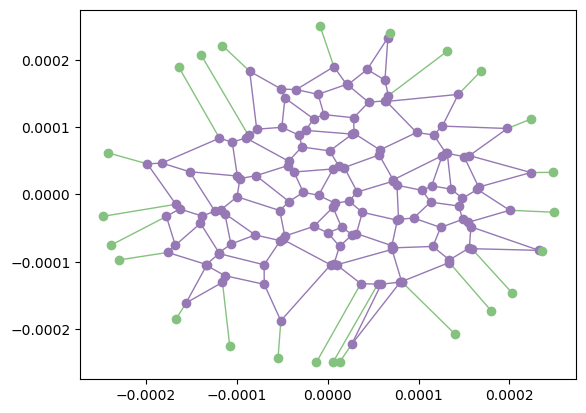

In [9]:
network_type = 'voronoi'
network_shape = 'circular'
random_seed = 5
num_internal_nodes = 0
num_external_nodes = 80
num_seed_nodes = None
network_size = 200e-6
external_size = 250e-6
external_offset = 0.0

network_spec = NetworkSpec(network_type=network_type,
                            network_shape=network_shape,
                            random_seed=random_seed,
                            num_internal_nodes=num_internal_nodes,
                            num_external_nodes=num_external_nodes,
                            num_seed_nodes=num_seed_nodes,
                            network_size=network_size,
                            external_size=external_size,
                            external_offset=external_offset)

network = generate_network(network_spec)
network.draw()
S_ee = network.get_S_ee(1.0)

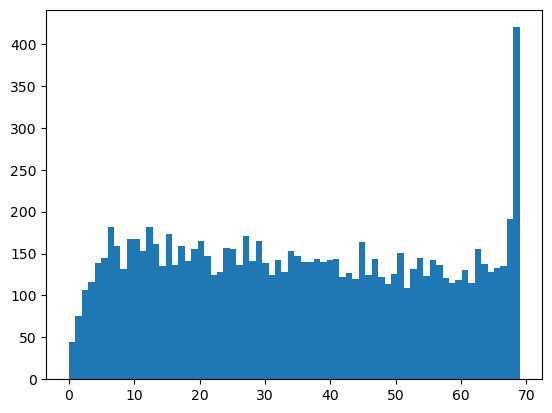

In [10]:
# fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 15), dpi=300)
n = 1000
# colors = plt.cm.viridis(np.linspace(0,1,n))
A = []
N = 70
for i in range(0,10000):
    network_type = 'delaunay'
    network_shape = 'circular'
    random_seed = i
    num_internal_nodes = N
    num_external_nodes = N
    num_seed_nodes = None
    network_size = 200e-6
    external_size = 250e-6
    external_offset = 0.0

    network_spec = NetworkSpec(network_type=network_type,
                                network_shape=network_shape,
                                random_seed=random_seed,
                                num_internal_nodes=num_internal_nodes,
                                num_external_nodes=num_external_nodes,
                                num_seed_nodes=num_seed_nodes,
                                network_size=network_size,
                                external_size=external_size,
                                external_offset=external_offset)

    network = generate_network(network_spec)
    # network.draw(show_external_indices=False,equal_aspect=True,highlight_nodes=[42])
    # plt.show()
    S_ee = network.get_S_ee(1.0)
    _,eigenvec = np.linalg.eig(S_ee)
    ipr_contribution = np.abs(eigenvec)**4
    
    # # We will get the componet of this which has the highest contribution
    ipr_max_where = np.where(ipr_contribution==np.max(ipr_contribution))
    ipr_max_index = ipr_max_where[1][0]
    A.append(ipr_max_index)
    # if ipr_max_index == N-1:
    #     maxx = np.max(ipr_contribution[:,N-1])
    #     plt.plot(np.arange(0,N,1)[ipr_contribution[:,N-1]==maxx],maxx,"k.",alpha=0.1)

plt.hist(A, bins=N)
plt.show()

In [11]:
# load the hdf5 file
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

filename = r"/home/baruva/Scattering_Data/del_circ_ni70_ne70.h5"

A =[]
B = []
with h5py.File(filename, 'r') as f:
    # List all groups
    data = f["S_ee"]
    for idx in tqdm(range(0,10000)):
        data = f["S_ee"][f'matrix_idx={idx}']
        _,eigenvec = np.linalg.eig(data)
        ipr_contribution = np.abs(eigenvec)**4
        ipr_contributionr = np.real(eigenvec)
        ipr_contributioni = np.imag(eigenvec)

        ipr_max_where = np.where(ipr_contributionr==np.max(ipr_contributionr))
        ipr_max_index = ipr_max_where[1][0]

        ipr_max_wherei = np.where(ipr_contributioni==np.max(ipr_contributioni))
        ipr_max_indexi = ipr_max_wherei[1][0]
        A.append(ipr_max_index)
        B.append(ipr_max_indexi)

plt.hist(A, bins=70)
plt.show()
plt.hist(B, bins=70)
plt.show()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/baruva/Scattering_Data/del_circ_ni70_ne70.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)